<a href="https://colab.research.google.com/github/habstrakT808/Self-Organizing-Maps-with-Elbow-Method-Optimization/blob/main/HAFIYAN_AL_MUQAFFI__SELF_ORGANIZING_MAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Maps

SOM merupakan model JST yang melatih data dengan pendekatan unsupervised learning. Pada praktikum, penentuan jumlah cluster didasarkan pada nilai  Silhouette untuk mengukur homogenitas cluster. Pada UAP kali ini, implementasikan penentuan jumlah cluster yang optimal dengan elbow method.

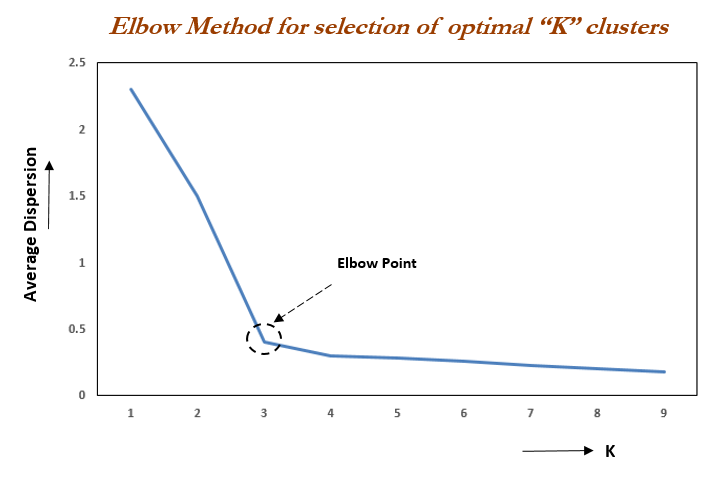

In [1]:
# Training SOM

import numpy as np
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min_index = np.argmin(d)
            centroids[min_index] += lrate * (x - centroids[min_index])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min_index = np.argmin(d)
        labels.append(min_index)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')


In [2]:
# Fungsi Elbow Method

def elbow_method(X, max_cluster):
    distortions = []
    for num_cluster in range(1, max_cluster + 1):
        centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=num_cluster)
        distortions.append(sum([np.linalg.norm(x - centroids[labels[i]]) ** 2 for i, x in enumerate(X)]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for SOM')
    plt.show()

    elbow = np.diff(distortions, 2)
    best_k = -1
    max_val = -float('inf')
    for i, val in enumerate(elbow):
        if val > max_val:
            max_val = val
            best_k = i + 2

    return best_k

In [4]:
import pandas as pd
data = pd.read_csv("Data SOM.csv")

# Hanya pilih kolom A1 hingga A14, dan drop kolom CustomerID dan Class
data = data.drop(columns=['CustomerID', 'Class'])
print(data.head())


   A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159


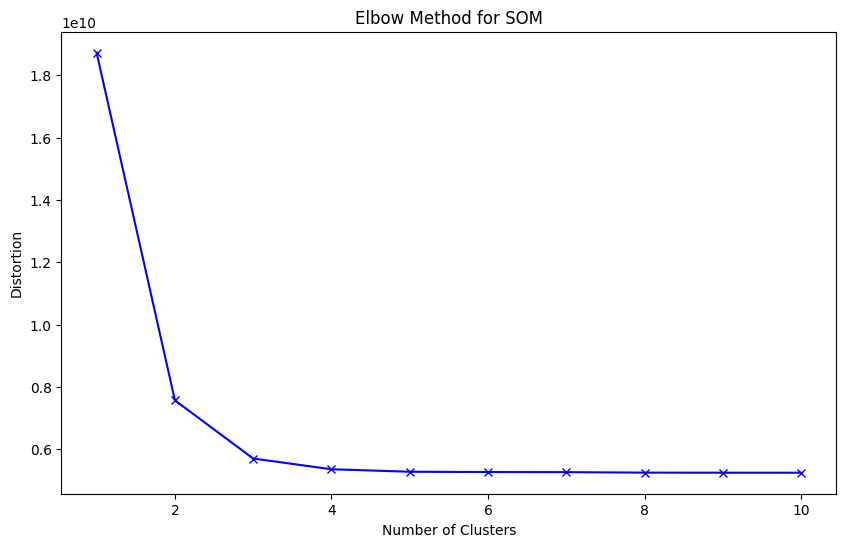

Jumlah cluster optimal: 2


In [5]:
X = data.values
best_k = elbow_method(X, max_cluster=10)
print(f'Jumlah cluster optimal: {best_k}')

Silhouette score: 0.9659886262121283


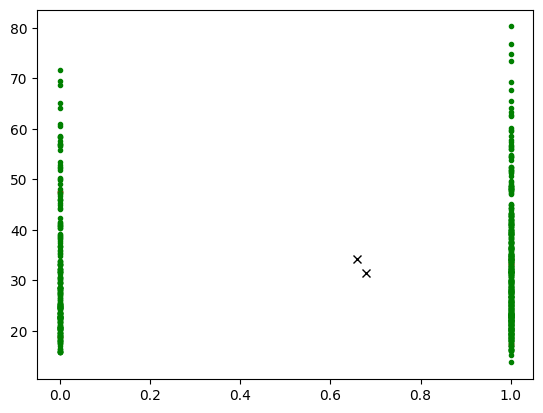

In [6]:
from sklearn.metrics import silhouette_score

X = data.values
centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=2)

silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)


# Analisis

1. Jelaskan konsep Elbow Method di SOM!
2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?
3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan!

### Analisis

**1. Konsep Elbow Method di SOM:**

Elbow Method adalah teknik yang digunakan untuk menentukan jumlah cluster optimal dalam teknik clustering, termasuk pada Self-Organizing Maps (SOM). Prinsip dari Elbow Method adalah menghitung "distorsi" atau total error (biasanya menggunakan sum of squared distances) untuk setiap jumlah cluster yang diuji. Distorsi yang lebih rendah menunjukkan bahwa data lebih terkelompok dengan baik.

Saat jumlah cluster bertambah, distorsi akan terus menurun, tetapi pada titik tertentu (yang disebut "elbow point"), penurunan distorsi akan melambat secara signifikan. Titik ini mengindikasikan jumlah cluster yang optimal karena penambahan cluster lebih lanjut tidak memberikan perbaikan yang signifikan pada kualitas clustering.

Pada SOM, Elbow Method diterapkan dengan cara:
- Mencoba berbagai nilai jumlah cluster (K) dan menghitung distorsi untuk setiap nilai K.
- Menggambar grafik distorsi versus K untuk melihat titik elbow, yang menunjukkan jumlah cluster yang optimal.

**2. Jumlah Cluster Optimal yang Dihasilkan Melalui Elbow Method:**

Berdasarkan hasil yang diperoleh dari metode Elbow, jumlah cluster optimal yang dihasilkan adalah **2**. Hal ini terlihat pada grafik distorsi versus jumlah cluster, di mana penurunan distorsi mulai melambat pada K = 2, yang menunjukkan bahwa penambahan cluster lebih lanjut tidak memberikan peningkatan signifikan pada kualitas clustering.

**3. Pengaruh Tuning Parameter pada SOM:**

- **`lrate` (Learning Rate):**
  - Learning rate mengontrol seberapa besar pembaruan bobot centroid selama pelatihan.
  - Jika nilai `lrate` terlalu besar, pembaruan bisa menjadi terlalu drastis dan model sulit untuk konvergen. Sebaliknya, jika terlalu kecil, model bisa membutuhkan lebih banyak iterasi untuk konvergen.
  - Pada eksperimen ini, `lrate = 0.1` memberikan hasil yang stabil tanpa memperburuk konvergensi model.

- **`b` (Decay Rate):**
  - `b` menentukan seberapa cepat learning rate berkurang seiring dengan bertambahnya epoch.
  - Nilai `b = 0.5` memungkinkan pembaruan yang cukup cepat pada awalnya, tetapi kemudian learning rate menurun untuk memungkinkan konvergensi yang lebih halus di epoch selanjutnya.

- **`max_epoch` (Jumlah Epoch):**
  - `max_epoch` adalah jumlah iterasi atau epoch yang digunakan dalam pelatihan.
  - Semakin banyak epoch, model memiliki lebih banyak kesempatan untuk belajar dan memperbarui bobot centroid.
  - Dengan `max_epoch = 100`, model memiliki cukup waktu untuk mencapai konvergensi dan menghasilkan clustering yang optimal tanpa terlalu banyak iterasi.

- **`n_cluster` (Jumlah Cluster):**
  - Jumlah cluster `n_cluster` menentukan berapa banyak centroid yang akan dipelajari oleh model.
  - Pada eksperimen ini, jumlah cluster yang optimal yang diperoleh melalui Elbow Method adalah 2.
  - Menambahkan lebih banyak cluster tidak memberikan keuntungan yang signifikan dalam hal distorsi, yang tercermin pada nilai Silhouette score yang tinggi.

**Kesimpulan:**
Dengan mengatur parameter seperti `lrate`, `b`, dan `max_epoch` dengan bijak, serta menggunakan Elbow Method untuk menentukan jumlah cluster yang optimal, kita dapat mencapai hasil clustering yang baik. Dalam hal ini, jumlah cluster optimal adalah 2, yang memberikan nilai Silhouette score yang sangat tinggi (0.9659886262121283), menunjukkan bahwa model menghasilkan cluster yang homogen dan terpisah dengan jelas.